In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

import pandas as pd
import matplotlib.pyplot as plt

## Задание 1
Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

In [9]:
names_by_year = {}
for year in range(1900,2001):
    names_by_year[year] = pd.read_csv(f'names/yob{year}.txt', names=['Name','Gender','Count'])
names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_ruth_robert = names_all[names_all['Name'].isin(['Ruth', 'Robert'])]
names_ruth_robert = names_ruth_robert.groupby([names_ruth_robert.index, 'Name']).sum()

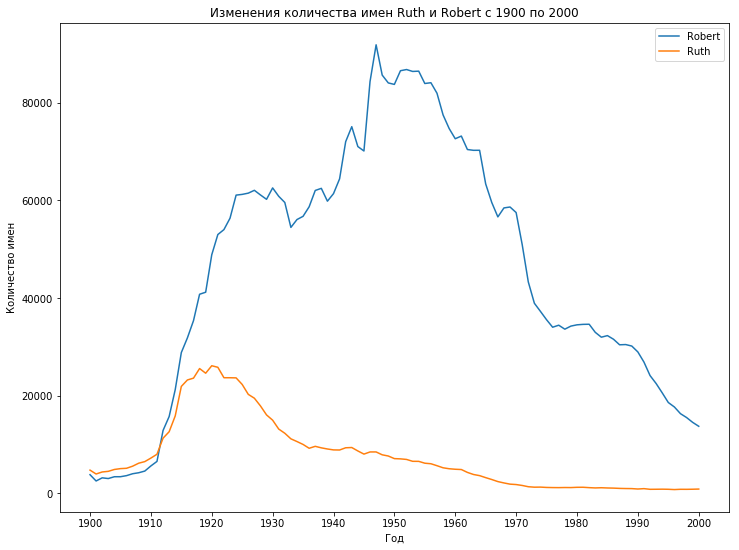

In [10]:
ruth_robert_plot = names_ruth_robert.unstack().plot()
ruth_robert_plot.set_title('Изменения количества имен Ruth и Robert с 1900 по 2000')
ruth_robert_plot.set_xlabel('Год')
ruth_robert_plot.set_ylabel('Количество имен')
ruth_robert_plot.set_xticks(range(1900,2010, 10))
ruth_robert_plot.legend(['Robert', 'Ruth'])

## Задание 2
Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

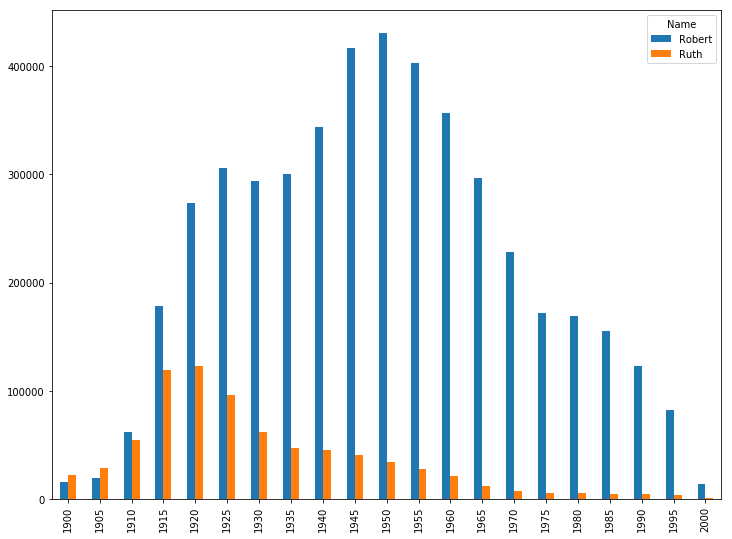

In [11]:
dates_range = range(1900, 2005, 5)
names_rr_unstack = names_ruth_robert.unstack()
rows_to_concat = {}
for counter, year in enumerate(dates_range):
    start = 5 * counter
    end = 5 * counter + 5
    rows_to_concat[year] = names_rr_unstack[start:end].\
    reset_index(drop=True).agg('Count').sum()


ruth_robert_5year = pd.concat(rows_to_concat).unstack()
ruth_robert_5year.plot(kind='bar')

## Задание 3
Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

In [5]:
import seaborn as sbs

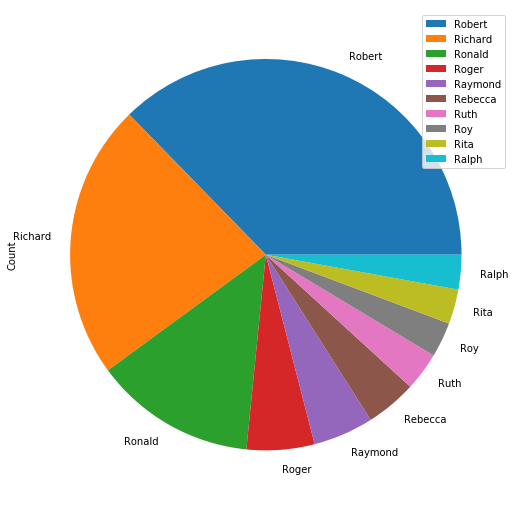

In [12]:
top_5_names_1950 = names_all[names_all.index==1950]
top_5_names_1950 = top_5_names_1950.reset_index(drop=True).set_index('Name')
top_5_names_1950_r = top_5_names_1950.filter(regex=r'^R', axis=0).\
                     sort_values(by='Count', ascending=False).head(10)
top_5_names_1950_r.plot(kind='pie', y='Count')

## Задание 4
Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

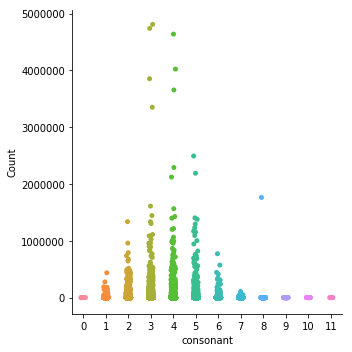

In [19]:
import seaborn as sns
names_all_grouped = names_all.groupby('Name').sum().sort_values(by='Count', ascending=False)
# a  = 'James'
# sum([*map(a.lower().count, 'aeiou')])
names_all_grouped = names_all_grouped.reset_index()
names_all_grouped['consonant'] = names_all_grouped[['Name']]\
.applymap(lambda x: len(x) - sum([*map(x.lower().count, 'aeiou')]))
# sns.jointplot(data=names_all_grouped, y='Count', x='consonant', kind='scatter')
sns.catplot(data=names_all_grouped, y='Count', x='consonant')